# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Importing Dataframe

In [3]:
df = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Prepared Data/death_cases_gender.csv', index_col = False)

/var/folders/gv/sm1b476s1zz2r143g9h9qgj40000gq/T/ipykernel_27399/3299034779.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Prepared Data/death_cases_gender.csv', index_col = False)


In [4]:
death_cases_gender = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Prepared Data/death_cases_gender.csv', index_col = False)

/var/folders/gv/sm1b476s1zz2r143g9h9qgj40000gq/T/ipykernel_27399/4153222061.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  death_cases_gender = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Prepared Data/death_cases_gender.csv', index_col = False)


In [5]:
death_cases_gender.head()

,Unnamed: 0,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region
0,0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,26874,28326,37.8,55200,51.315217,South
1,1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,26874,28326,37.8,55200,51.315217,South
2,2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South
3,3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South
4,4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South


In [15]:
#check if there is mixed data types 
for col in death_cases_gender.columns.tolist():
  weird = (death_cases_gender[[col]].applymap(type) != death_cases_gender[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (death_cases_gender[weird]) > 0:
    print (col)

state_code


In [16]:
#describe the datatypes
death_cases_gender.dtypes

Unnamed: 0             int64
county_code          float64
county                object
state                 object
lat                  float64
long                 float64
date                  object
cases                  int64
state_code            object
deaths                 int64
male                   int64
female                 int64
median_age           float64
population             int64
female_percentage    float64
region                object
dtype: object

In [22]:
#change the datatype of the county column 
death_cases_gender['county'] = death_cases_gender['county'].astype(str)

# Exploring Relationships

## Correlations:

In [29]:
# Create a subset excluding the "county" and "state" and "date"columns

sub = df[['county_code', 'lat', 'long', 'cases', 'deaths','male','female','median_age','population','female_percentage']]

In [30]:
sub


,county_code,lat,long,cases,deaths,male,female,median_age,population,female_percentage
0,1001.0,32.539527,-86.644082,0,0,26874,28326,37.8,55200,51.315217
1,1001.0,32.539527,-86.644082,0,0,26874,28326,37.8,55200,51.315217
2,1001.0,32.539527,-86.644082,0,0,26874,28326,37.8,55200,51.315217
3,1001.0,32.539527,-86.644082,0,0,26874,28326,37.8,55200,51.315217
4,1001.0,32.539527,-86.644082,0,0,26874,28326,37.8,55200,51.315217
...,...,...,...,...,...,...,...,...,...,...
3480815,56045.0,43.839612,-104.567488,1880,22,3768,3332,42.9,7100,46.929577
3480816,56045.0,43.839612,-104.567488,1880,22,3768,3332,42.9,7100,46.929577
3480817,56045.0,43.839612,-104.567488,1880,22,3768,3332,42.9,7100,46.929577
3480818,56045.0,43.839612,-104.567488,1884,22,3768,3332,42.9,7100,46.929577


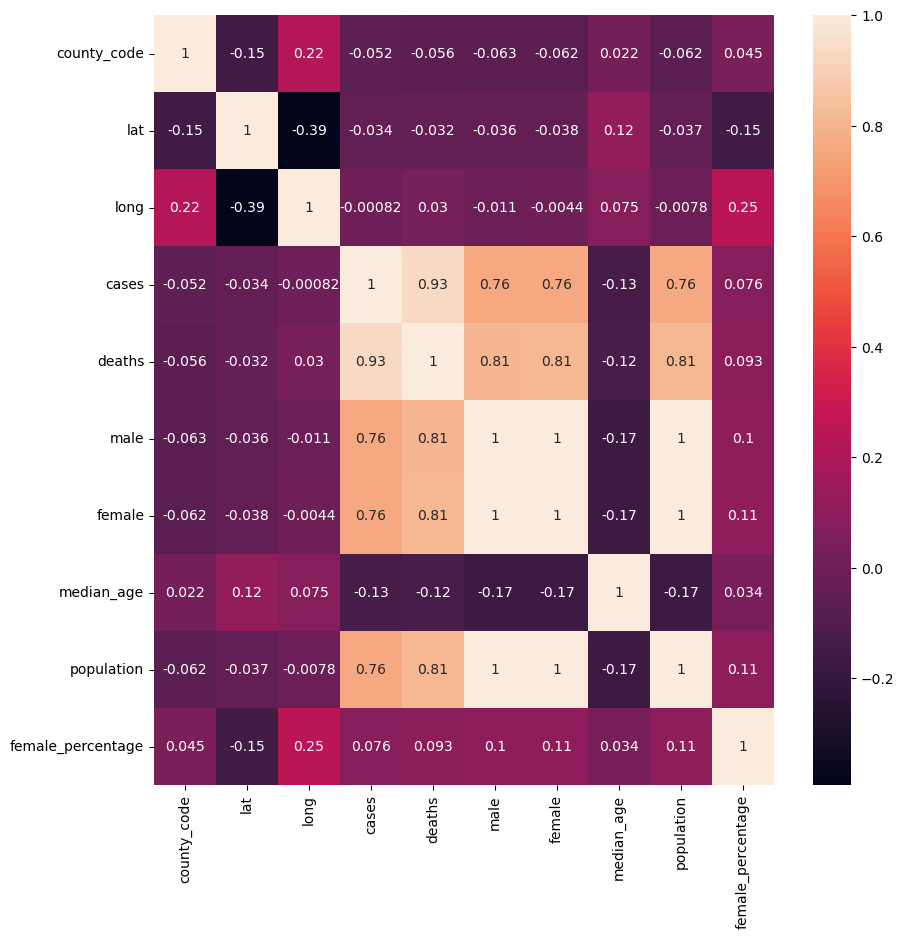

In [31]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

0: no relationship
0.1–0.3: weak relationship
0.3–0.5: moderate relationship
0.5–1.0: strong relationship

In a correlation matrix, most of the relationship are weak and moderate.

# Scatterplot 

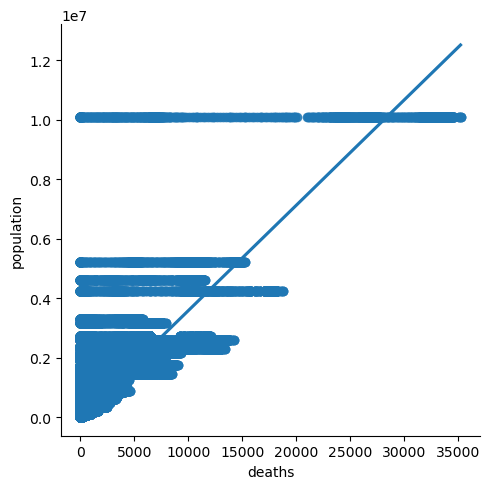

In [33]:
# Create a scatterplot for the "deaths" and "population" columns in seaborn

sns.lmplot(x = 'deaths', y = 'population', data = df)

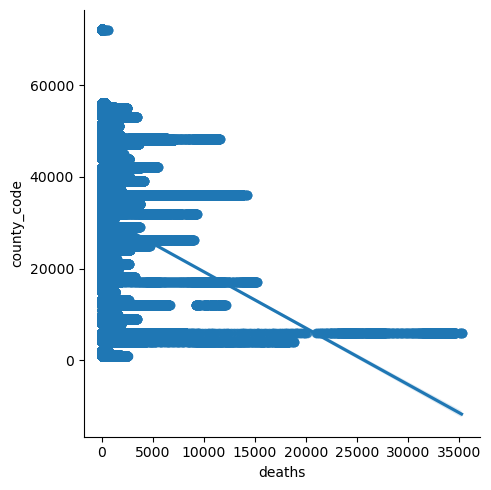

In [34]:
# Create a scatterplot for the "deaths" and "county_code" columns in seaborn

sns.lmplot(x = 'deaths', y = 'county_code', data = df)

While there is a general negative relationship between these two columns, there are still quite a few points that don’t correspond with the trend.

# Pair plots

In [35]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['cases', 'deaths', 'population', 'median_age']]

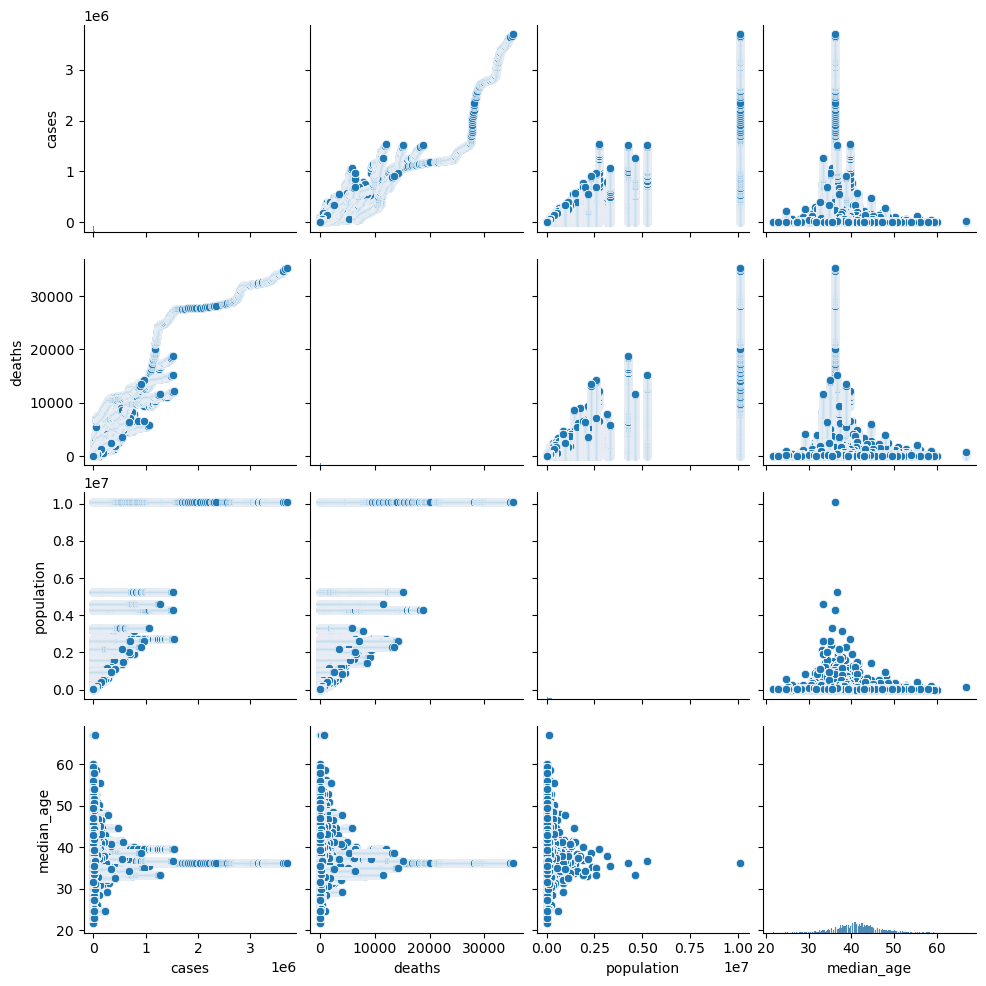

In [36]:
# Create a pair plot 

g = sns.pairplot(sub_2)

# Categorical Plots:

<Axes: xlabel='median_age', ylabel='Count'>

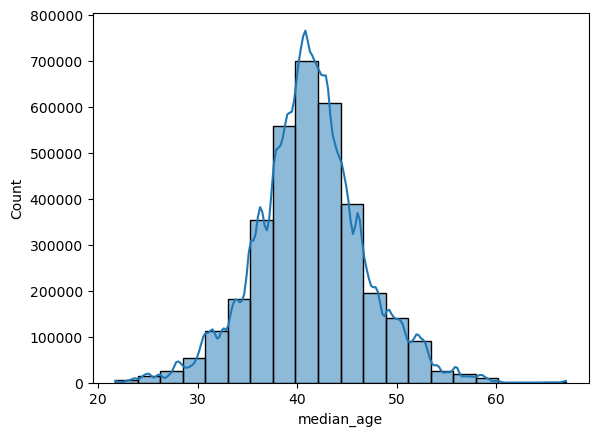

In [39]:
sns.histplot(df['median_age'], bins = 20, kde = True)

In [40]:
df.loc[df['median_age'] < 20, 'Age category'] = 'Teenage'

In [41]:
df.loc[(df['median_age'] >= 20) & (df['median_age'] < 50), 'Age category'] = 'Middle age'

In [42]:
df.loc[df['median_age'] >= 50, 'Age category'] = 'old age'

In [43]:
df['Age category'].value_counts(dropna = False)

Age category
Middle age    3268944
old age        211876
Name: count, dtype: int64

In [44]:
df.columns

Index(['Unnamed: 0', 'county_code', 'county', 'state', 'lat', 'long', 'date',
       'cases', 'state_code', 'deaths', 'male', 'female', 'median_age',
       'population', 'female_percentage', 'region', 'Age category'],
      dtype='object')

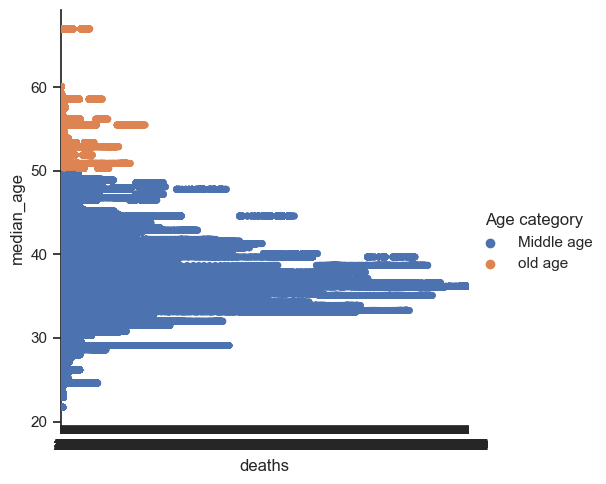

In [45]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="deaths", y="median_age", hue="Age category", data=df)